In [1]:
from y0.graph import NxMixedGraph, DEFAULT_TAG
from y0.dsl import X, Y
from y0.examples import identifiability_2
from y0.algorithm.identify import identify, Identification
from y0.algorithm.taheri_design import simplify_latent_dag

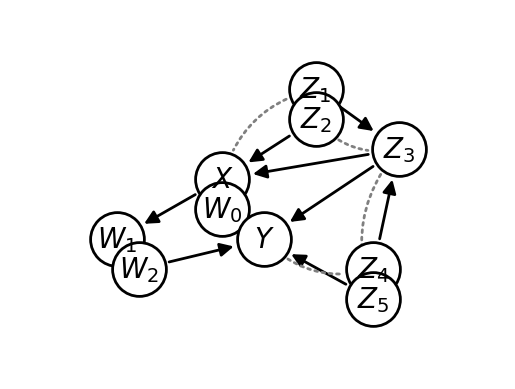

In [2]:
graph = identifiability_2
graph.draw()

In [3]:
estimand = identify(
    Identification.from_parts(
        graph=graph, outcomes={Y}, treatments={X}
    )
)

In [4]:
nuisance = set(graph.nodes()).difference(estimand.get_variables())
nuisance

set()

In [5]:
lv_dag = graph.to_latent_variable_dag()
lv_dag

In [6]:
for v in nuisance:
    lv_dag[v][DEFAULT_TAG] = True

In [7]:
simplify_latent_dag(lv_dag)

SimplifyResults(graph=<networkx.classes.digraph.DiGraph object at 0x1363bd150>, widows=set(), redundant=set())

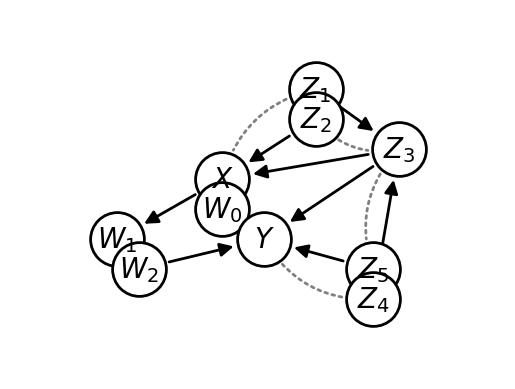

In [8]:
new_graph = NxMixedGraph.from_latent_variable_dag(lv_dag)
new_graph.draw()